# Fashion mnist autoencoder

Following code defines autoencoder that uses only the dense layers to fifferenciate the images contained in the fashion mnist dataset.

The code also shows up the hiperparameter layer output and there is also the code that generates the output based on the hiperparameters input.

In [ ]:
import numpy as np
from keras.datasets import fashion_mnist

# Loading the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Dodanie szumu Gaussa do danych wejściowych
x_train_noisy = X_train + np.random.normal(loc=0.0, scale=0.5, size=X_train.shape)
x_test_noisy = X_test + np.random.normal(loc=0.0, scale=0.5, size=X_test.shape)

# Zabezpieczenie przed wartościami poza zakresem [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)



#X_train = np.expand_dims(X_train, axis=-1)
#X_train_scaled = (X_train/255).copy()

In [ ]:
# defining the autoencoder structure
from keras.layers import Conv2D, MaxPool2D,GlobalAveragePooling2D,Dense,Input, Reshape, UpSampling2D,BatchNormalization, GaussianNoise
from keras.models import Model
from keras.optimizers import Adam
act_func = 'selu'
aec_dim_num = 2


encoder_layers = [
    Flatten(input_shape=(28, 28, 1)),
    Dense(256, activation=act_func),
    Dense(128, activation=act_func),
    Dense(32, activation=act_func)
]

decoder_layers = [
    Dense(128, activation=act_func),
    Dense(256, activation=act_func),
    Dense(784, activation='sigmoid'),  # 28x28=784
    Reshape((28, 28, 1))
]


lrng_rate = 0.0002
tensor = input_aec = input_encoder = Input(X_train.shape[1:])

for layer in encoder_layers:
  tensor = layer(tensor)
output_encoder = tensor
dec_tensor = input_decoder = Input(output_encoder.shape[1:])

for layer in decoder_layers:
  tensor = layer(tensor)
  dec_tensor = layer(dec_tensor)
output_aec = tensor
output_decoder = dec_tensor
autoencoder = Model(inputs = input_aec,outputs = output_aec)
encoder = Model(inputs = input_encoder,outputs = output_encoder)
decoder = Model(inputs = input_decoder,outputs = dec_tensor)
autoencoder.compile(optimizer=Adam(lrng_rate),loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, X_train, epochs=30, batch_size=256, shuffle=True,  validation_data=(x_test_noisy, X_test))

Epoch 1/30
235/235 [==============================] - 5s 18ms/step - loss: -975.2145 - val_loss: -1100.6991
Epoch 2/30
235/235 [==============================] - 4s 16ms/step - loss: -1097.5637 - val_loss: -1100.7115
Epoch 3/30
235/235 [==============================] - 4s 16ms/step - loss: -1097.5719 - val_loss: -1100.7201
Epoch 4/30
235/235 [==============================] - 4s 18ms/step - loss: -1097.5820 - val_loss: -1100.7258
Epoch 5/30
235/235 [==============================] - 4s 16ms/step - loss: -1097.5901 - val_loss: -1100.7385
Epoch 6/30
235/235 [==============================] - 4s 16ms/step - loss: -1097.6008 - val_loss: -1100.7462
Epoch 7/30
235/235 [==============================] - 4s 17ms/step - loss: -1097.6118 - val_loss: -1100.7556
Epoch 8/30
235/235 [==============================] - 4s 16ms/step - loss: -1097.6255 - val_loss: -1100.7717
Epoch 9/30
235/235 [==============================] - 4s 16ms/step - loss: -1097.6427 - val_loss: -1100.7976
Epoch 10/30
235/235 

313/313 [==============================] - 1s 2ms/step


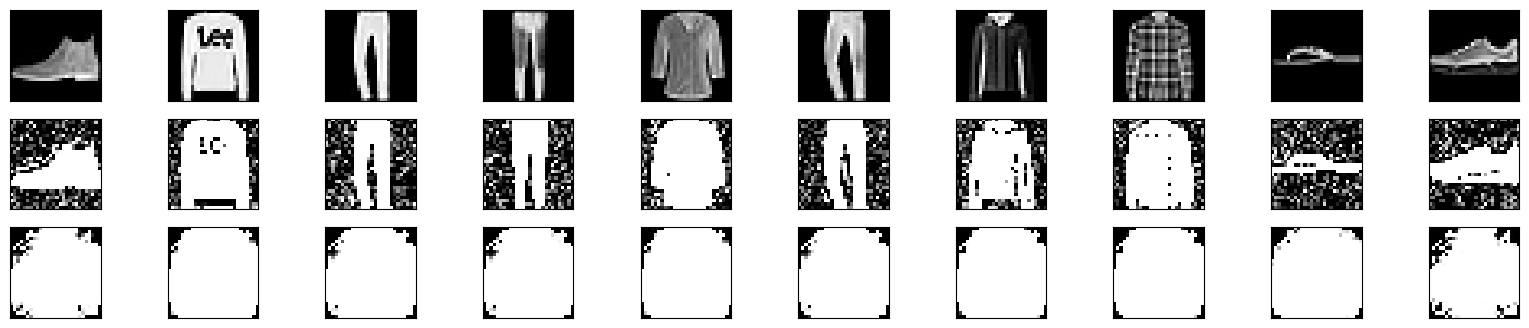

In [ ]:
import matplotlib.pyplot as plt

# Generowanie przykładowych obrazów
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display denoised image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


188/188 [==============================] - 0s 1ms/step


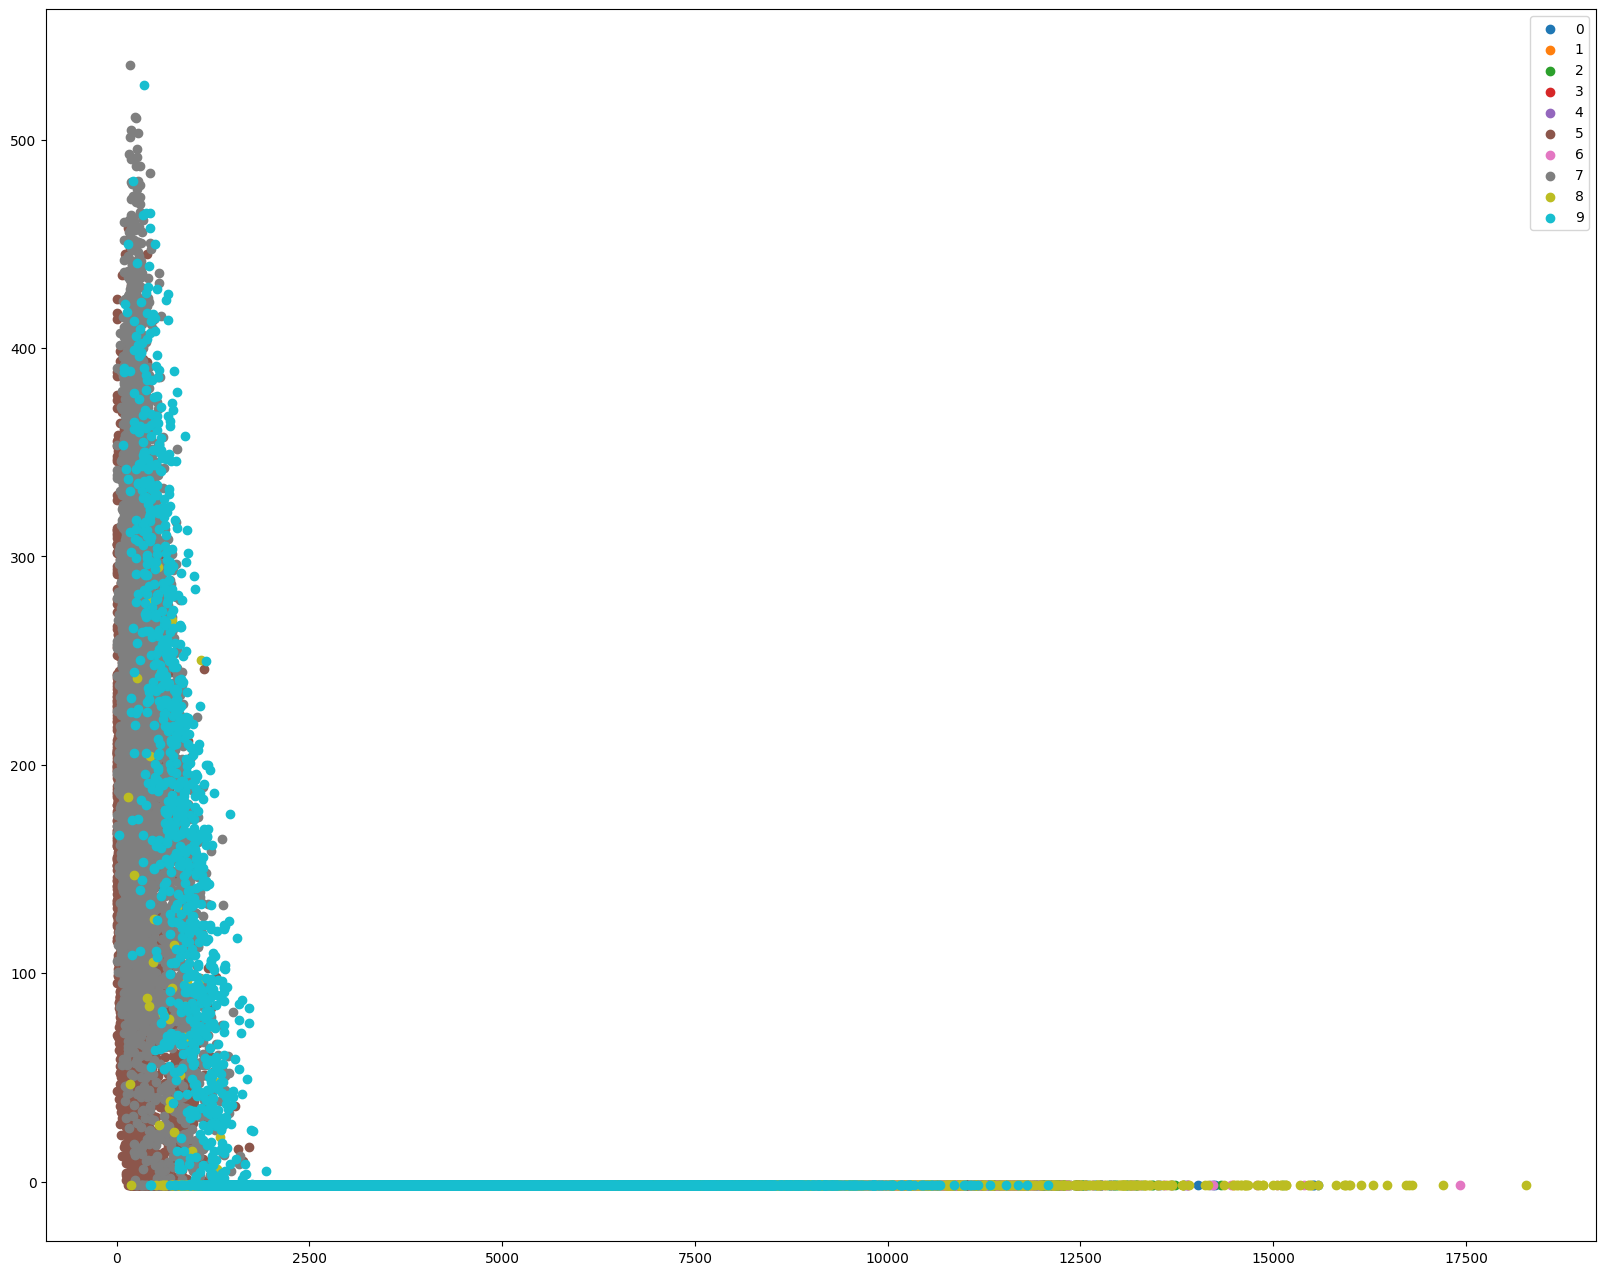

In [ ]:
# representing learning data in the hiperparameters dimension
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (20,16))
for i in range(10):
  digits = y_train == i
  needed_imgs = X_train[digits,...]
  preds = encoder.predict(needed_imgs)
  ax.scatter(preds[:,0], preds[:,1])
ax.legend(list(range(10)))